   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
variances of each feature [72.9624454132999, 22.850761786701725, 3.6689218892828612, 0.5178709107154993]


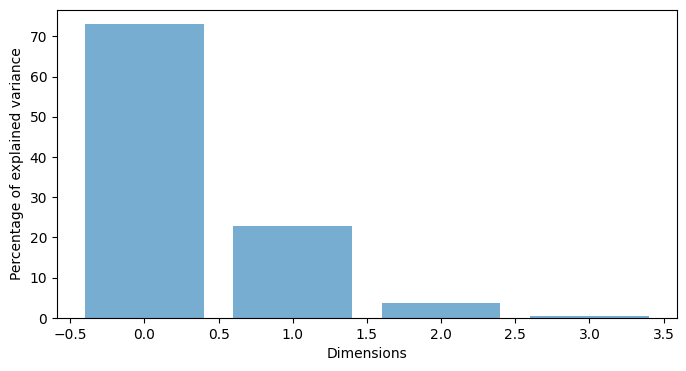

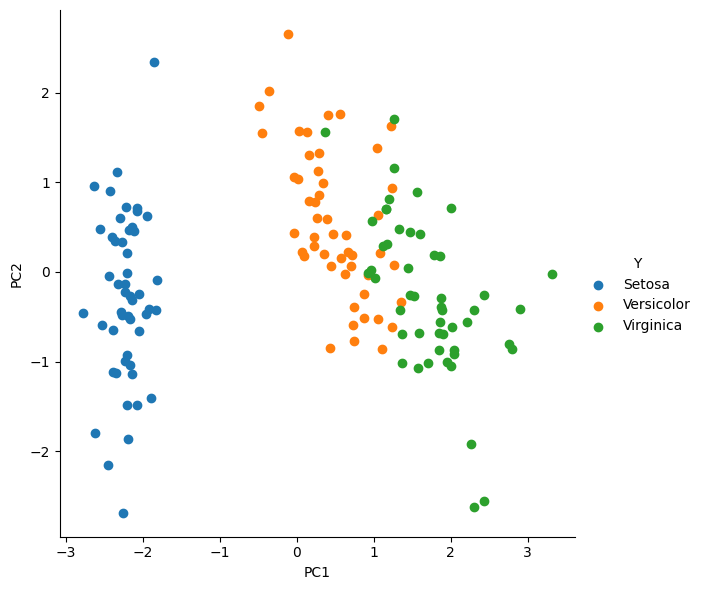

None


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
df=pd.read_csv('A2_PCA_iris.csv')
print(df.head())

X = df.drop(['variety'],axis=1)

X_scaled = StandardScaler().fit_transform(X)
X_scaled[:5]

y=df['variety']

features = X_scaled.T
cov_matrix = np.cov(features)
cov_matrix[:5]

values, vectors = np.linalg.eig(cov_matrix)
values[:5]

vectors[:5]
explained_variances = []
for i in range(len(values)):
    explained_variances.append((values[i] / np.sum(values))*100)

print("variances of each feature",explained_variances)

plt.figure(figsize=(8,4))
plt.bar(range(4),explained_variances, alpha=0.6)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')

projected_1 = X_scaled.dot(vectors.T[0])
projected_2 = X_scaled.dot(vectors.T[1])
res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
res['Y'] = y
res.head()

sns.FacetGrid(res, hue="Y", height=6).map(plt.scatter, 'PC1', 'PC2').add_legend()
print(plt.show())


